In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [3]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, channel_shift_range=10., horizontal_flip=True)

In [33]:
chosen_image = random.choice(os.listdir("data/dogs-vs-cats/train/dog/"))

In [34]:
image_path = "data/dogs-vs-cats/train/dog/" + chosen_image

In [35]:
assert os.path.isfile(image_path)

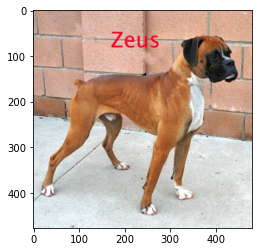

In [36]:
# Obtain image

image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

`flow()` takes numpy data and generates batches of augmented data.

In [37]:
# Generate batches of augmented images from this image

aug_iter = gen.flow(image)

In [38]:
# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

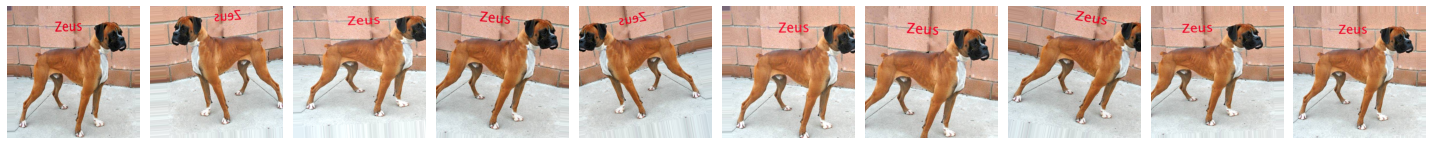

In [39]:
# Augmented Images
plotImages(aug_images)

To save these images so that you can add them to your training set, then to `gen.flow()`, you should also specify the parameter `save_to_dir` and set it equal to a valid location on disk.

In [40]:
aug_iter = gen.flow(image, save_to_dir='data/dogs-vs-cats/train/dog', save_prefix='aug-image-', save_format='jpeg')